In [5]:
import pickle
import pandas as pd
import sys
import numpy as np

In [6]:
!ls

all_feature_homes-rmse.ipynb all_feature_homes.ipynb      all_homes.ipynb


In [7]:
sys.path.append("../../code/")
sys.path.append("../code/")


from common_functions import tableau20blind, format_axes, latexify
from regional_average_contribution import contribution

In [8]:
out_overall = pickle.load(open('../../data/input/all_regions.pkl', 'r'))


In [9]:
mf_pred = pickle.load(open('../data/mf_pred_subset_homes.pkl','r'))


In [14]:
from sklearn.metrics import mean_squared_error

In [45]:
appliance="fridge"
feature="occ"
k=4
region = "Austin"
df = out_overall[region]
pred_df = mf_pred[appliance][feature][k]
gt_df = df[pred_df.columns].ix[pred_df.index]
rms = np.sqrt(mean_squared_error(gt_df, pred_df))
rms

38.408004579241052

In [111]:
result = {'MF-105 homes, feature':{},'KNN':{},'MF-105 homes':{}}

In [112]:
best_combination = {}
for appliance, appliance_struct in mf_pred.iteritems():
    print appliance
    best_appliance=1000
    for appliance_feature_struct in appliance_struct['None']:
        for latent_factors, appliance_df in appliance_struct[appliance_feature].iteritems():
            try:
                region = "Austin"
                df = out_overall[region]
                pred_df = mf_pred[appliance][appliance_feature][latent_factors]
                gt_df = df[pred_df.columns].ix[pred_df.index]

                rms = np.sqrt(mean_squared_error(gt_df, pred_df))

                if rms<best_appliance:

                    best_appliance=rms
                    best_combination[appliance]=(appliance_feature, latent_factors, rms)
            except:
                pass
    result['MF-105 homes'][appliance]=best_appliance
            
print best_combination

hvac
wm
fridge
mw
oven
dw
{'hvac': ('rooms', 1, 226.84001784365859), 'wm': ('rooms', 1, 5.7135756977635106), 'fridge': ('rooms', 5, 38.217563412364591), 'mw': ('rooms', 3, 6.0198103895195247), 'oven': ('rooms', 5, 10.412947373735774), 'dw': ('rooms', 2, 9.3353511843913175)}


In [113]:
best_combination = {}
for appliance, appliance_struct in mf_pred.iteritems():
    print appliance
    best_appliance=1000
    for appliance_feature, appliance_feature_struct in appliance_struct.iteritems():
        for latent_factors, appliance_df in appliance_struct[appliance_feature].iteritems():
            try:
                region = "Austin"
                df = out_overall[region]
                pred_df = mf_pred[appliance][appliance_feature][latent_factors]
                gt_df = df[pred_df.columns].ix[pred_df.index]

                rms = np.sqrt(mean_squared_error(gt_df, pred_df))

                if rms<best_appliance:

                    best_appliance=rms
                    best_combination[appliance]=(appliance_feature, latent_factors, rms)
            except:
                pass
    result['MF-105 homes, feature'][appliance]=best_appliance
            
print best_combination

hvac
wm
fridge
mw
oven
dw
{'hvac': ('area_rooms', 4, 226.03042680238124), 'wm': ('None', 1, 5.7119902861414875), 'fridge': ('area', 5, 38.189255143190742), 'mw': ('area', 3, 5.9449317804769137), 'oven': ('area_rooms', 8, 9.8887071354026119), 'dw': ('occ_area', 2, 8.4975349501345878)}


In [106]:
(pred_df-gt_df).describe()

,dw_1,dw_2,dw_3,dw_4,dw_5,dw_6,dw_7,dw_8,dw_9,dw_10,dw_11,dw_12
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,-0.627905,0.106824,-0.225615,-0.027909,0.314270,0.992700,0.614534,-0.301653,-0.113831,0.351927,0.055831,0.189040
std,11.782825,8.992783,10.493215,10.966151,9.545043,10.172639,9.912495,10.612070,10.856258,9.557116,9.177544,10.958449
min,-32.481836,-22.491453,-26.282004,-35.894438,-21.177443,-19.433764,-24.147291,-31.030829,-31.386717,-23.099750,-23.280154,-24.068298
25%,-5.544347,-3.793471,-5.821686,-4.720020,-4.320200,-4.462809,-3.521858,-4.181575,-3.350320,-3.739437,-3.535579,-3.835977
50%,0.081203,0.393300,-0.367597,0.531170,0.278666,0.260451,1.122758,0.747265,0.721893,0.546889,1.114003,0.935016
75%,5.125544,5.113537,5.340905,4.769791,5.458203,6.105311,5.647691,4.073125,4.886963,3.684534,3.954853,5.517145
max,31.664072,26.290534,32.260957,30.291662,28.666861,39.667889,31.792330,31.537598,26.569549,31.846065,22.944019,38.958611


In [107]:
mf_pred['hvac']['None'][2].head()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
26,333.177627,652.431313,955.681352,1040.261046,726.902850,365.290914
59,215.776261,423.739045,619.437380,672.793409,473.910375,237.425860
94,88.175027,172.938788,253.130200,275.390248,193.012145,96.911105
101,117.975378,231.832961,339.054945,368.429261,259.417455,129.848179
222,770.062248,1508.142416,2211.678719,2409.729449,1680.489580,844.732799


In [82]:
# Initialising results
results = {'KNN':{},'MF-105 homes':{},'MF-105 homes, additional features':{}
          ,"MF-516 homes, additional features":{},"MF-516 homes":{}}

# Initialising results
results = {'KNN':{},'MF-105 homes':{},'MF-105 homes, additional features':{}
          }

In [114]:
# Loading KNN results
knn_results = pickle.load(open('../data/knn_pred_all_homes.pkl','r'))
for appliance, appliance_df in knn_results.iteritems():
    
    pred_df = appliance_df
    pred_df.columns = [appliance+"_"+str(x) for x in pred_df.columns]
    region = "Austin"
    df = out_overall[region]
    #pred_df = mf_pred[appliance][appliance_feature][latent_factors]
    gt_df = df[pred_df.columns].ix[pred_df.index]

    rms = np.sqrt(mean_squared_error(gt_df, pred_df))
    result['KNN'][appliance]=rms

In [115]:

pd.DataFrame(result)

,KNN,MF-105 homes,"MF-105 homes, feature"
dw,9.739296,9.335351,8.497535
fridge,44.874118,38.217563,38.189255
hvac,215.952897,226.840018,226.030427
mw,6.884251,6.019810,5.944932
oven,11.116406,10.412947,9.888707
wm,5.877304,5.713576,5.711990


In [85]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_subset_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    appliance_feature='None'
    for latent_factors, appliance_df in appliance_struct[appliace_feature].iteritems():
        
        pred = appliance_df.median().mean()
        if pred<best_appliance:
            best_appliance=pred
            best_combination[appliance]=(appliance_feature, latent_factors, pred)
            results['MF-105 homes'][appliance] = pred
print best_combination

{'hvac': ('None', 8, 21.46749926033644), 'wm': ('None', 2, 44.05241484909982), 'fridge': ('None', 3, 28.47212892859601), 'mw': ('None', 2, 43.359407921872695), 'oven': ('None', 1, 52.20834411012954), 'dw': ('None', 9, 52.777753183644315)}


In [94]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_subset_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    for appliance_feature, appliance_feature_struct in appliance_struct.iteritems():
        for latent_factors, appliance_df in appliance_feature_struct.iteritems():
            pred = appliance_df.median().mean()
            if pred<best_appliance:
                best_appliance=pred
                best_combination[appliance]=(appliance_feature, latent_factors, pred)
                results['MF-105 homes, additional features'][appliance] = pred

In [95]:
best_combination

{'dw': ('occ', 2, 46.37772338804214),
 'fridge': ('occ_area', 2, 24.91311995551921),
 'hvac': ('rooms', 8, 21.29756141099046),
 'mw': ('occ', 5, 41.22580648634024),
 'oven': ('area_rooms', 8, 48.164684764512515),
 'wm': ('occ_rooms', 3, 43.7072363087808)}

In [54]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_all_homes.pkl','r'))
mf_subset_results = pickle.load(open('../data/mf_subset_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    appliance_feature='None'        
    for latent_factors, appliance_df in appliance_struct[appliance_feature].iteritems():

        pred = appliance_df.ix[mf_subset_results[appliance][appliance_feature][latent_factors].index].median().mean()
        if pred<best_appliance:
            best_appliance=pred
            best_combination[appliance]=(appliance_feature, latent_factors, pred)
            results['MF-516 homes'][appliance] = pred
print best_combination

{'hvac': ('None', 8, 21.46749926033644), 'wm': ('None', 2, 44.05241484909982), 'fridge': ('None', 3, 28.47212892859601), 'mw': ('None', 2, 43.359407921872695), 'oven': ('None', 1, 52.20834411012954), 'dw': ('None', 9, 52.777753183644315)}


In [65]:
appliance,appliance_df.median().mean()

('dw', 50.4382645923347)

In [76]:
mf_results[appliance]['None'][2].ix[mf_subset_results[appliance]['None'][2].index].head()

,dw_1,dw_2,dw_3,dw_4,dw_5,dw_6,dw_7,dw_8,dw_9,dw_10,dw_11,dw_12
26,34.855730,15.678797,32.211937,12.414853,7.081288,4.487206e+00,41.639537,34.499743,23.885481,24.447988,20.859448,12.524931
94,69.538060,37.909134,15.603427,57.894529,9.337666,3.851588e+00,0.216471,25.804832,41.669234,13.493729,107.075068,11.431772
101,2.427404,3.593241,34.530698,57.570727,287.247342,inf,193612.131846,14.789327,83439.134871,939.253790,29100.317226,16308.978198
222,290.869484,102.405023,119.893203,2243.262119,531704.275173,3.576656e+05,11093392.557923,193543.866055,301766.157879,725858.700485,140.186500,128.305188
545,16.639845,20.144247,21.551902,22.272346,4.260483,2.458241e+01,11.635052,30.932435,22.175190,18.541411,14.927862,8.404200


In [77]:
mf_subset_results[appliance]['None'][2].head()

,dw_1,dw_2,dw_3,dw_4,dw_5,dw_6,dw_7,dw_8,dw_9,dw_10,dw_11,dw_12
26,34.855730,15.678797,32.211937,12.414853,7.081288,4.487206e+00,41.639537,34.499743,23.885481,24.447988,20.859448,12.524931
94,69.538060,37.909134,15.603427,57.894529,9.337666,3.851588e+00,0.216471,25.804832,41.669234,13.493729,107.075068,11.431772
101,2.427404,3.593241,34.530698,57.570727,287.247342,inf,193612.131846,14.789327,83439.134871,939.253790,29100.317226,16308.978198
222,290.869484,102.405023,119.893203,2243.262119,531704.275173,3.576656e+05,11093392.557923,193543.866055,301766.157879,725858.700485,140.186500,128.305188
545,16.639845,20.144247,21.551902,22.272346,4.260483,2.458241e+01,11.635052,30.932435,22.175190,18.541411,14.927862,8.404200


In [63]:
appliance_df.ix[mf_subset_results[appliance][appliance_feature][latent_factors].index].median().mean()

52.777753183644315

In [49]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_all_homes.pkl','r'))
mf_subset_results = pickle.load(open('../data/mf_subset_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    for appliance_feature, appliance_feature_struct in appliance_struct.iteritems():
        for latent_factors, appliance_df in appliance_feature_struct.iteritems():
            
            pred = appliance_df.ix[mf_subset_results[appliance][appliance_feature][latent_factors].index].median().mean()
            if pred<best_appliance:
                best_appliance=pred
                best_combination[appliance]=(appliance_feature, latent_factors, pred)
                results['MF-516 homes, additional features'][appliance] = pred

In [86]:
%matplotlib inline
results_df = pd.DataFrame(results)

In [87]:
results_df

,KNN,MF-105 homes,"MF-105 homes, additional features"
dw,55.305178,52.777753,46.377723
fridge,30.453563,28.472129,24.913120
hvac,27.268441,21.467499,21.297561
mw,49.199756,43.359408,41.225806
oven,51.708601,52.208344,48.164685
wm,43.735111,44.052415,43.707236


In [88]:
map_appliance = {'fridge':'Fridge','dw':'Dish\nwasher','mw':'Microwave','hvac':'HVAC','oven':'Oven','wm':'Washing\nmachine'}

In [89]:
#results_df[results_df>100]=100
#results_df=results_df.fillna(100)
results_df.index = [map_appliance[appliance] for appliance in results_df.index]
#results_df.plot(kind='bar', colors=tableau20blind[::2])

In [90]:
results_df = results_df.ix[['HVAC','Fridge','Oven','Dish\nwasher','Washing\nmachine','Microwave']]

In [20]:
results_df = results_df[['KNN','MF']]

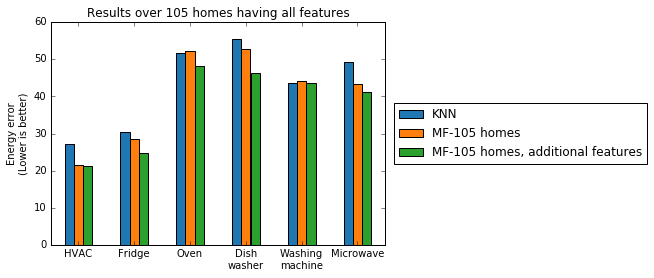

In [93]:
import matplotlib.pyplot as plt
results_df.plot(kind='bar',rot=0, colors=tableau20blind[::2])
lgd = plt.legend(loc='right', bbox_to_anchor=(1.8, 0.5))
plt.ylabel("Energy error\n(Lower is better)");
plt.title("Results over 105 homes having all features")
plt.savefig("../results/subset.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("../results/subset.png",bbox_extra_artists=(lgd,), bbox_inches='tight')

Comparing MF with and without homes containing those features

In [23]:
best_combination

{'dw': ('occ', 1, 47.696584280069516),
 'fridge': ('occ_area', 2, 24.91311995551921),
 'hvac': ('rooms', 8, 21.29756141099046),
 'mw': ('occ', 2, 41.60195238757644),
 'oven': ('area_rooms', 8, 48.164684764512515),
 'wm': ('occ_rooms', 3, 43.7072363087808)}

In [31]:
pd.DataFrame(results)

,KNN,MF
dw,55.305178,47.696584
fridge,30.453563,24.913120
hvac,27.268441,21.297561
mw,49.199756,41.601952
oven,51.708601,48.164685
wm,43.735111,43.707236


In [100]:
for appliance in ['fridge','hvac','dw','mw','wm','oven']:
    mf_best = mf_pred[appliance][best_combination[appliance][0]][best_combination[appliance][1]]
    knn_best = knn_results[appliance]
    mf_best.columns = knn_best.columns
    common_index = np.intersect1d(mf_best.index, knn_best.index)
    mf_best = mf_best.ix[common_index]
    knn_best = knn_best.ix[common_index]
    knn_best_copy = knn_best.copy()
    mf_best_copy = mf_best.copy()
    max_two = (mf_best_copy.where(mf_best_copy > knn_best_copy, knn_best_copy).fillna(mf_best_copy))
    print appliance,100*((-mf_best+knn_best)/max_two).unstack().std()

fridge 57.3978457853
hvac 55.0774075892
dw 51.1713352881
mw 57.3493816955
wm 53.9492074301
oven 55.2763277251


In [ ]:
Calculating win/loss

In [97]:
o = {}
for appliance in ['fridge','hvac','dw','mw','wm','oven']:
    print appliance
    mf_best_pred = mf_pred[appliance][best_combination[appliance][0]][best_combination[appliance][1]]
    knn_best_pred = knn_results[appliance]
    mf_best_pred.columns = knn_best_pred.columns
    common_index = np.intersect1d(mf_best_pred.index, knn_best_pred.index)
    region = "Austin"
    df = out_overall[region]
    pred_df = mf_pred[appliance][appliance_feature][latent_factors]
    gt_df = df[pred_df.columns].ix[pred_df.index]
    mf_best_pred = mf_best_pred.ix[common_index]
    knn_best_pred = knn_best_pred.ix[common_index]
    error_mf = (gt_df-mf_best_pred).abs()
    error_knn = (gt_df-knn_best_pred).abs()
    win = (error_knn>error_mf).sum().sum()
    loss = (error_knn<error_mf).sum().sum()
   
    o[appliance]={'win':win, "loss":loss, "win/loss":win*1./loss,"win/(win_loss)":win*1./(win+loss)} 

fridge
hvac
dw
mw
wm
oven


In [98]:
pd.DataFrame(o).T

,loss,win,win/(win_loss),win/loss
dw,288,408,0.586207,1.416667
fridge,423,393,0.481618,0.929078
hvac,277,293,0.514035,1.057762
mw,249,315,0.558511,1.265060
oven,179,181,0.502778,1.011173
wm,358,338,0.485632,0.944134


In [92]:
knn_best_pred.columns, mf_best_pred.columns

(Index([u'hvac_5', u'hvac_6', u'hvac_7', u'hvac_8', u'hvac_9', u'hvac_10'], dtype='object'),
 Index([u'hvac_5', u'hvac_6', u'hvac_7', u'hvac_8', u'hvac_9', u'hvac_10'], dtype='object'))

In [118]:
knn_best.median().mean()

51.70860070119945

In [119]:
appliance

'oven'